In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('raw_data/1h/PM10/2020_PM10_1g.xlsx')
# skip information
data = data.drop(index=[0,1], axis=0)
data = data.reset_index(drop=True)

In [3]:
# example
display(data)

,Nr,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
0,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
1,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
2,Kod stanowiska,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKamGoraMOB-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMieszMOB-PM10-1g,DsNowRudJezi-PM10-1g,DsOlawZolnAK-PM10-1g,...,WpKozieosLes-PM10-1g,WpPilaKusoci-PM10-1g,WpPleszAlMic-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznRatajeMOB-PM10-1g,ZpKoszArKraj-PM10-1g,ZpPolczSolanMOB-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczPils02-PM10-1g
3,2020-01-01 01:00:00,13.2656,20.9803,28.6103,NaN,80.1424,73.4212,164.139,55.811,58.1482,...,32.8424,41.4021,36.8756,37.3714,28.9952,11.437,NaN,NaN,27.1519,155.217
4,2020-01-01 02:00:00,21.8265,16.2792,16.0381,NaN,99.717,20.9602,50.4853,14.2842,18.0683,...,40.156,59.8856,66.3461,20.2835,18.6745,50.2739,NaN,NaN,22.8034,34.0925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,2020-12-31 20:00:00,13.4354,110.489,138.435,NaN,216.782,70.6657,185.772,403.41,34.5031,...,75.9289,139.884,110.254,NaN,85.5207,29.0465,28.6692,116.603,36.208,18.3336
8783,2020-12-31 21:00:00,9.31784,95.2876,163.427,NaN,256.613,101.584,211.201,358.864,36.0384,...,79.0472,175.674,109.681,NaN,101.324,26.0424,33.074,53.3246,37.6338,17.2375
8784,2020-12-31 22:00:00,14.0085,63.4842,154.043,NaN,229.159,101.218,211.556,330.506,34.6089,...,87.301,132.118,90.0704,NaN,102.137,31.3701,34.3002,27.9006,47.7411,19.3319
8785,2020-12-31 23:00:00,14.2199,97.6043,215.237,NaN,226.893,79.1241,160.6,332.133,28.6939,...,92.6771,139.652,78.7774,NaN,108.839,34.2911,37.7539,28.0046,50.1252,22.4708


In [5]:
# only krakow's data
def krakow_filter(df):
    text = df.columns.to_list()
    regex = re.compile('^MpKrak.*')
    krakow = list(filter(regex.match, text))
    return krakow

In [6]:
# at first, separated df for each param (dict of df)
# the same column name -> adding data
# columns name meaning 

# no BaP per hour
parameters = ['PM2.5', 'PM10'] # global

def data_load(skipr, dropr, start_year, end_year):
    df_dict = {p: pd.DataFrame() for p in parameters}
    for p in parameters:
        for year in range(start_year, end_year):
            dir = 'raw_1h/' + p + '/' + str(year) + '_' + p + '_1g.xlsx' 
            try:
                data = pd.read_excel(dir, skiprows=skipr)
                data = data.drop(index=dropr, axis=0)
                data[data.columns[0]] = pd.to_datetime(data[data.columns[0]])
                data = data.set_index(data.columns[0])
                data.index.name = 'data'
                krakow = krakow_filter(data)
                df_dict[p] = pd.concat([df_dict[p], data[krakow]])
            except FileNotFoundError:
                print(f"Plik {dir} nie został znaleziony.")
    return df_dict


In [7]:
dfs2016 = data_load(0, [0,1], 2004, 2016)

Plik raw_1h/PM2.5/2004_PM2.5_1g.xlsx nie został znaleziony.
Plik raw_1h/PM2.5/2005_PM2.5_1g.xlsx nie został znaleziony.


C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [8]:
dfs2024 = data_load(1, [0,1,2,3], 2016, 2024)

In [9]:
dfs2024

{'PM2.5':                     MpKrakAlKras MpKrakBujaka MpKrakBulwar
 data                                                      
 2016-01-01 01:00:00      248,173          NaN      214,737
 2016-01-01 02:00:00      240,423          NaN      239,222
 2016-01-01 03:00:00      230,277        311,2      220,587
 2016-01-01 04:00:00      241,381        316,5      217,168
 2016-01-01 05:00:00      238,346        287,8      187,316
 ...                          ...          ...          ...
 2023-12-31 20:00:00      21.5386          NaN      23.2713
 2023-12-31 21:00:00       27.697          NaN      29.3338
 2023-12-31 22:00:00      34.1736          NaN      49.2374
 2023-12-31 23:00:00      35.3961          NaN      35.8862
 2024-01-01 00:00:00      46.5418          NaN      37.0108
 
 [70128 rows x 3 columns],
 'PM10':                     MpKrakAlKras MpKrakBujaka MpKrakBulwar MpKrakDietla  \
 data                                                                      
 2016-01-01 01:00:00  

In [10]:
# different names
locations2016 = set()
locations2024 = set()
for p in parameters:
    locations2016.update(dfs2016[p].columns.tolist())
    locations2024.update(dfs2024[p].columns.tolist())
print(sorted(locations2016))
print(sorted(locations2024))

# not all locations - metadata
# download manually remaining locations
# add in the end ( 1 file one station, whole time period)

['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakowWIOSAKra6117', 'MpKrakowWIOSBuja6119', 'MpKrakowWIOSBulw6118', 'MpKrakowWIOSPrad6115']
['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakDietla', 'MpKrakOsPias', 'MpKrakSwoszo', 'MpKrakTelime', 'MpKrakWadow', 'MpKrakZloRog']


In [11]:
# global dataset
def dataset(parameter):
    # locations set
    locations = set(dfs2016.get(parameter, pd.DataFrame()).columns) | set(dfs2024.get(parameter, pd.DataFrame()).columns)
    # combined df
    # unpacking args
    df = pd.DataFrame(columns = [* locations], index=dfs2016[parameter].index.union(dfs2024[parameter].index))   
    for location in locations:
        # only two options
        if location in dfs2016[parameter].columns:
            df[location] = dfs2016[parameter][location]
        else:
            df[location] = dfs2024[parameter][location]        
    return df
    

In [12]:
dfPM10 = dataset('PM10')
dfPM25 = dataset('PM2.5')

In [13]:
print(dfPM10.columns)
print(dfPM25.columns)

Index(['MpKrakowWIOSBuja6119', 'MpKrakAlKras', 'MpKrakowWIOSAKra6117',
       'MpKrakDietla', 'MpKrakWadow', 'MpKrakBulwar', 'MpKrakSwoszo',
       'MpKrakowWIOSPrad6115', 'MpKrakTelime', 'MpKrakBujaka', 'MpKrakZloRog',
       'MpKrakowWIOSBulw6118', 'MpKrakOsPias'],
      dtype='object')
Index(['MpKrakowWIOSBuja6119', 'MpKrakAlKras', 'MpKrakowWIOSPrad6115',
       'MpKrakowWIOSAKra6117', 'MpKrakBujaka', 'MpKrakBulwar',
       'MpKrakowWIOSBulw6118'],
      dtype='object')


In [14]:
# type is object
dfPM10.dtypes
#dfs2016['PM10'].dtypes
# there are different types inside

MpKrakowWIOSBuja6119    object
MpKrakAlKras            object
MpKrakowWIOSAKra6117    object
MpKrakDietla            object
MpKrakWadow             object
MpKrakBulwar            object
MpKrakSwoszo            object
MpKrakowWIOSPrad6115    object
MpKrakTelime            object
MpKrakBujaka            object
MpKrakZloRog            object
MpKrakowWIOSBulw6118    object
MpKrakOsPias            object
dtype: object

In [15]:
string_values_df = dfPM10.map(lambda x: isinstance(x, str))
dfPM10[string_values_df.any(axis=1)]
# cannot convert coma separated to float

,MpKrakowWIOSBuja6119,MpKrakAlKras,MpKrakowWIOSAKra6117,MpKrakDietla,MpKrakWadow,MpKrakBulwar,MpKrakSwoszo,MpKrakowWIOSPrad6115,MpKrakTelime,MpKrakBujaka,MpKrakZloRog,MpKrakowWIOSBulw6118,MpKrakOsPias
data,,,,,,,,,,,,,
2016-01-01 01:00:00,NaN,NaN,NaN,"449,5",NaN,NaN,NaN,NaN,NaN,NaN,"342,924",NaN,NaN
2016-01-01 02:00:00,NaN,NaN,NaN,"382,1",NaN,NaN,NaN,NaN,NaN,NaN,"329,66",NaN,NaN
2016-01-01 03:00:00,NaN,NaN,NaN,"327,5",NaN,NaN,NaN,NaN,NaN,NaN,"322,539",NaN,NaN
2016-01-01 04:00:00,NaN,NaN,NaN,"332,7",NaN,NaN,NaN,NaN,NaN,NaN,"294,548",NaN,NaN
2016-01-01 05:00:00,NaN,NaN,NaN,"332,9",NaN,NaN,NaN,NaN,NaN,NaN,"285,527",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,NaN,NaN,NaN,"28,5545","18,6282",NaN,NaN,NaN,NaN,NaN,"27,8949",NaN,"35,7125"
2018-12-31 21:00:00,NaN,NaN,NaN,"39,0295","28,1481",NaN,NaN,NaN,NaN,NaN,"34,8302",NaN,"37,9557"
2018-12-31 22:00:00,NaN,NaN,NaN,"37,1867","34,6696",NaN,NaN,NaN,NaN,NaN,"34,8604",NaN,"40,9987"


In [16]:
def float_conversion(df):
    df.replace(',', '.', regex=True, inplace=True)
    df = df.infer_objects(copy=False)      # no warning
    df = df.apply(pd.to_numeric, errors='coerce')
    return df 

In [18]:
# before combining locations, so there is no warning with fillna
pd.set_option('future.no_silent_downcasting', True)
dfPM10 = float_conversion(dfPM10)
dfPM25 = float_conversion(dfPM25)

In [19]:
# combining the same location with different id
def matching_locations(df, station, old_station):
    df[station] = df[station].fillna(df[old_station]) # by data index
    df.drop([old_station], axis=1, inplace=True)
    return

In [20]:
dfPM10.isnull().sum()

MpKrakowWIOSBuja6119    137685
MpKrakAlKras            166744
MpKrakowWIOSAKra6117     88584
MpKrakDietla            106614
MpKrakWadow             114864
MpKrakBulwar            167000
MpKrakSwoszo            132860
MpKrakowWIOSPrad6115    132667
MpKrakTelime            163109
MpKrakBujaka            166616
MpKrakZloRog            106751
MpKrakowWIOSBulw6118     92122
MpKrakOsPias            108356
dtype: int64

In [21]:
matching_locations(dfPM10, 'MpKrakBujaka', 'MpKrakowWIOSBuja6119')
matching_locations(dfPM10, 'MpKrakAlKras', 'MpKrakowWIOSAKra6117')
matching_locations(dfPM10, 'MpKrakBulwar', 'MpKrakowWIOSBulw6118')
 
matching_locations(dfPM25, 'MpKrakBujaka', 'MpKrakowWIOSBuja6119')
matching_locations(dfPM25, 'MpKrakAlKras', 'MpKrakowWIOSAKra6117')
matching_locations(dfPM25, 'MpKrakBulwar', 'MpKrakowWIOSBulw6118')

In [22]:
# stations's name standarization
dfPM10.rename(columns={'MpKrakowWIOSPrad6115': 'MpKrakPrad'}, inplace=True)
dfPM25.rename(columns={'MpKrakowWIOSPrad6115': 'MpKrakPrad'}, inplace=True)

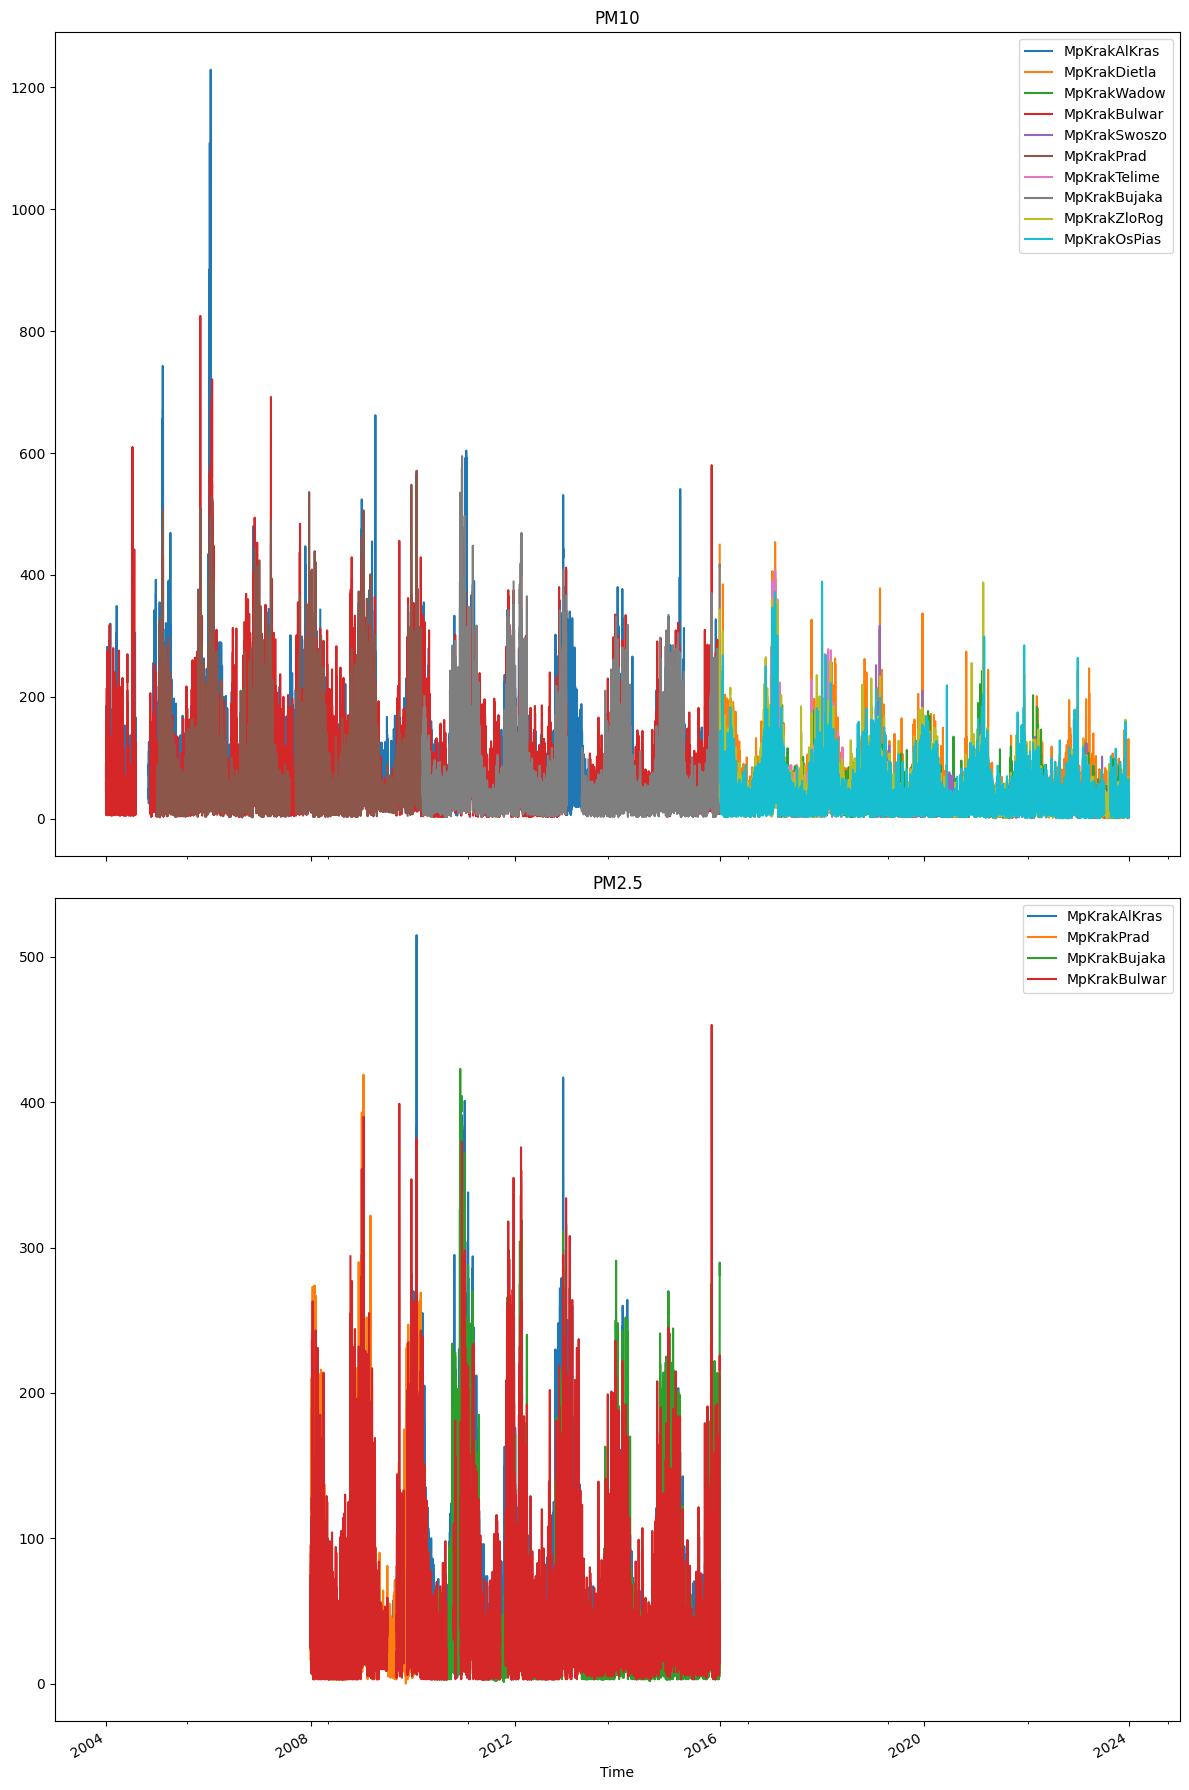

In [23]:
import warnings
warnings.filterwarnings("ignore", message=".*This axis already has a converter set.*")

fig, axes = plt.subplots(2, 1, figsize=(12, 18), sharex=True)

# # df.plot method works with NA (plt doesn't)
dfPM10.plot(ax=axes[0], title="PM10")
dfPM25.plot(ax=axes[1], title="PM2.5")

axes[1].set_xlabel("Time")
plt.tight_layout()
plt.show()

In [24]:
dfPM10.to_csv('data/1h/PM10.csv')
dfPM25.to_csv('data/1h/PM2.5.csv')